In [17]:
from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/BankCustomers.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependent_count,Education,Marital_Status,Income,Card Type,Months_on_book,Relationship Count,Months Inactive,Contacts_Count_12_mon,Credit Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Utilization_Rate
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,6.1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,10.5
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,0.0
3,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000,0.0
4,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311,31.1


---
### RQ1: What percentage of customers have Utilization Rate less than 30%? 

Your credit Utilization Rate is very important as it tells us how much debt you currently have on your credit card. It is said that maintaining a Utilization Rate of 30% or below is a healthy credit score. Below is a visualization which shows the percentage of customers who have a Utilization Rate less than 30%. 

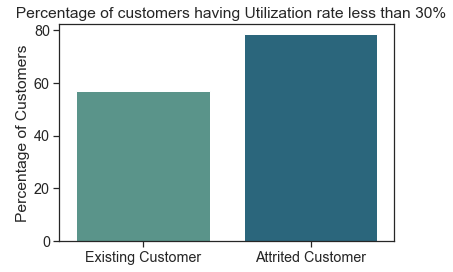

57% of the Existing Customers have a Utilization Rate less than 30%
78% of the Attrited Customers have a Utilization Rate less than 30%


In [16]:
project_functions.sns.set_theme(font_scale=1.3)
project_functions.sns.set_style("ticks")
lists=[]
df1 = df[df['Utilization_Rate']<=30]
a_flag = df1['Attrition_Flag'].unique()

for customers in a_flag:
    lists.append((len(df1[df1['Attrition_Flag']==customers])*100)/len(df[df['Attrition_Flag']==customers]))

project_functions.sns.barplot(x=a_flag, y=lists, data=df1, palette='crest').set_title('  Percentage of customers having Utilization rate less than 30%')
project_functions.plt.ylabel('Percentage of Customers')
project_functions.plt.show()
print('{}% of the Existing Customers have a Utilization Rate less than 30%'.format(round(lists[0])))
print('{}% of the Attrited Customers have a Utilization Rate less than 30%'.format(round(lists[1])))

- As we can see from the visualization above, a good amount of customers maintain a healthy credit score.
- More than half of Existing and Attrited customers have a Utilization rate less than 30%.
- But in comparison to the Existing Customer, more Attrited Customers have a good credit score.
---